






# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
# write your code here
df.shape 

(1898, 9)

#### Observations:

The Data has 1898 rows of observations and 9 columns.

#### Observations:


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
 
1. In the given Data Set, 4 columns(variables) are Objective type which can be  helpful to catagorize the data, 4 columns are integer type variables and 1 column is float type variable. 
2. There are no missing values in the Data Set

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name']=df.restaurant_name.astype('category') 
df['cuisine_type']=df.cuisine_type.astype('category')
df['day_of_the_week']=df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
1. Now the Data Set has 3 categorical columns 5 numerical columns and 1 objective type column. 
2. There are no missing values in the data set. 

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [6]:
# write your code here
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [7]:
df.describe(exclude="number").T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


### Observations:
#### Stats for Number variables: 
* There are no outliers obeserved in the data set. 
* There is no skewness in the data.
* The maximum order value is 35.41 dollars and the minimum order values is 4.47 dollars

#### Stats for Catagorial Variables

* There are 178 restaurants in the data set, and the popular restaurant is Shake Shack
* There are 14 unique cuisine types in the data set, the popular cusine type is American Cuisine
* Most of the orders were placed during weekends. 
* for 736 orders the ratings were not given by the customers. 


### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
df[df['rating']=="Not given"]["order_id"].count() ## logical condition to check the Not given in rating column

736

#### Observations:
Out of 1898 orders, 736 orders are not rated by the customers. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

<AxesSubplot:xlabel='rating', ylabel='Count'>

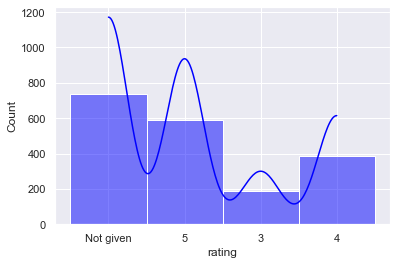

In [9]:
sns.histplot(df["rating"], bins=10, color='blue', kde=True)


### Observations:

* Most of the orders are non-rated in the data-set. 
* More than 500 orders received the ratings of 5 stars. 
* Less than 200 orderds got the ratings of 3 stars.

<AxesSubplot:xlabel='day_of_the_week', ylabel='Count'>

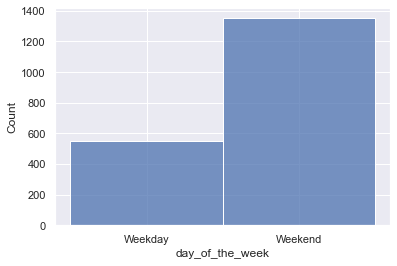

In [10]:
sns.histplot(df,x="day_of_the_week") # univariate Object type analysis using hist plot

### Observations

* Most of the orders were placed during weekends. 


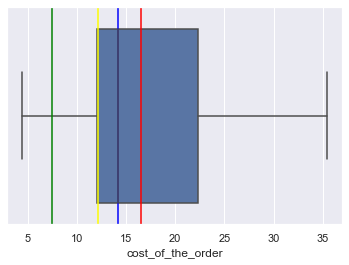

In [11]:
sns.boxplot(data=df, x="cost_of_the_order") # numerical variable analysis using boxplot
plt.axvline(df['cost_of_the_order'].mean(), color="red")
plt.axvline(df['cost_of_the_order'].median(), color="blue") 
plt.axvline(df['cost_of_the_order'].std(), color="green") 
plt.axvline(df['cost_of_the_order'].mode()[0], color="yellow") 

### Observations: 

* There is no outliers in the dataset. 
* The average order value is 17 dollars
* Cost of the most of the orders(mode) is around 15 dollars.
* Standard deviation between the order values is around 7 dollars. 


<AxesSubplot:xlabel='cuisine_type', ylabel='Count'>

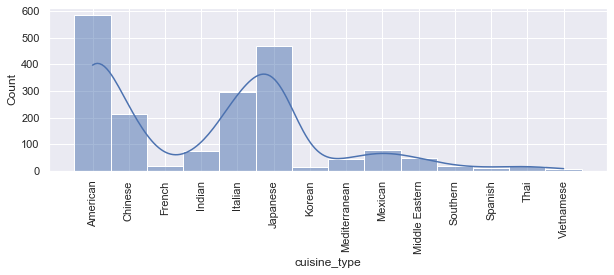

In [12]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.histplot(data=df,x="cuisine_type", kde=True) # categorical variable analysis using histplot

### Observations: 

* American cuisine is the highly ordered cuisine type followedby Japanese cuisine.
* The least popular cuisine types are Vietnamese, Spanish, Thai, Southern, Korean and French. 


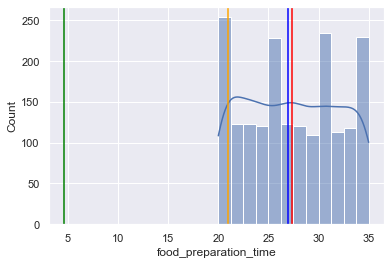

In [13]:
sns.histplot(data=df,x="food_preparation_time", kde=True)
plt.axvline(df["food_preparation_time"].mean(), color="red")
plt.axvline(df["food_preparation_time"].median(), color="blue") 
plt.axvline(df["food_preparation_time"].std(), color="green")
plt.axvline(df["food_preparation_time"].mode()[0], color="orange")

### Observations:

* There is no skewness in the data set. 
* The average food preparation time is 27 minutes
* Food preparation time for most of the orders(mode) is around 21 minutes.
* Standard deviation is around 7 minutes. 


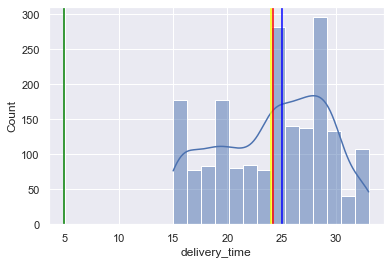

In [14]:
sns.histplot(data=df, x="delivery_time", kde=True)
plt.axvline(df["delivery_time"].mean(), color="red")
plt.axvline(df["delivery_time"].median(), color="blue") 
plt.axvline(df["delivery_time"].std(), color="green")
plt.axvline(df["delivery_time"].mode()[0], color="yellow")

### Observations: 

* There is no skewness in the data of delivery_time
* The average delivery time is around 24 minutes. 


### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [15]:
# write the code here
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5).reset_index() # counting the number of times restaurant name  using value_counts

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

* The restaruant Shake Shack received highest number of orders followed by The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicked and Parm restaurants. 




### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [16]:
# write the code here
df[df['day_of_the_week']=="Weekend"]['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:
 
 * Ameican cuisine is most popular among all other cuisines types during weekends as they received highest number of orders during Weekend. 

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [17]:
# write the code here
count_20_order=df[df['cost_of_the_order']>20]["cost_of_the_order"].count()
print("Count of Orders where the order value is > 20$:",count_20_order)

percentage_of_order=((df[df['cost_of_the_order']>20]['order_id'].count())/(df['order_id'].count()))*100
print("Percentage of Orders for which the order value is >20:","{:.2f}%".format(percentage_of_order))

Count of Orders where the order value is > 20$: 555
Percentage of Orders for which the order value is >20: 29.24%


#### Observations:

* There are 555 orders in the data set which has more than 20 dollars order value.
* The Percentage of orders which has more than 20$ is 29.24%.


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [18]:
# write the code here
Mean_delivery_time=df['delivery_time'].mean()
print("Avg delivery time takes to deliver the order is:","{:.2f}".format(Mean_delivery_time))

Avg delivery time takes to deliver the order is: 24.16


#### Observations:
 
 The mean delivery time of an order is 24.16 minutes. 

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [19]:
print("Maximum Order Value in the Dataset in $:",df['cost_of_the_order'].max())
max_order_cus_info=df[df['cost_of_the_order']==35.41]
max_order_cus_info.reset_index()


Maximum Order Value in the Dataset in $: 35.41


,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:

* The customer id who has spend maximum amount on a single order is "62359".
* This customer had placed his order on Weekday from Pylos restaurant. The cuisine type of the order is Mediterranean and order value is 35.41$


### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

<Figure size 720x216 with 0 Axes>

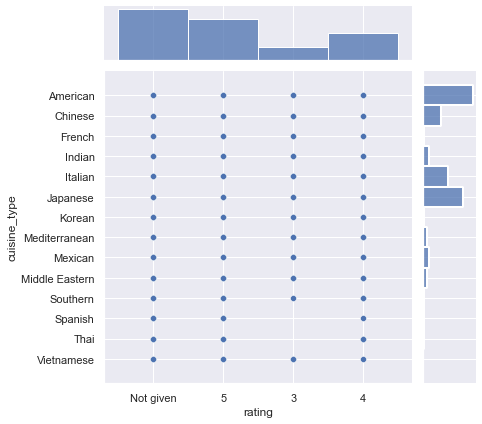

In [20]:
# Bivariate Analysis:
plt.figure(figsize=(10,3))
sns.jointplot(data=df,y="cuisine_type", x="rating")

### Observations:

* All the cuisine types has the orders for which the ratings were not given. 
* American cuisine is the frquently ordered cuisine among all the other cuisine. 

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

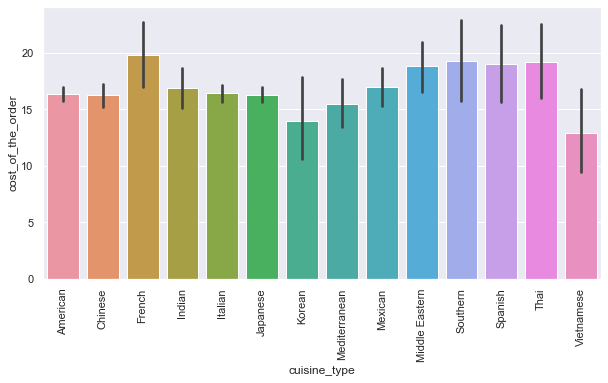

In [21]:
##Bi_variate-Analysis
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data=df,x="cuisine_type", y="cost_of_the_order")

### Observations:

* French cuisines high in cost compare to other cuisin types.
* The cheapest cuisine type is Korean cuisine.

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

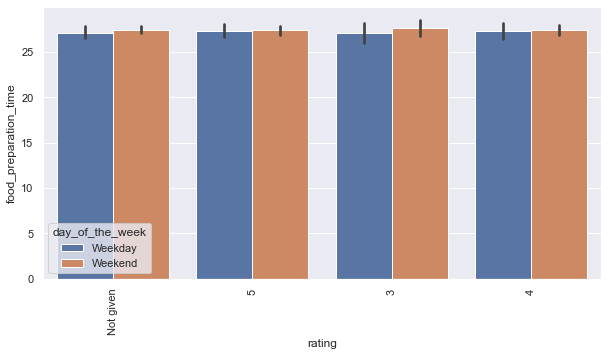

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data=df,x="rating", y="food_preparation_time", hue="day_of_the_week")

### Observations:

* Food preparation time during weekday and weekends are almost similar with the sort of similar ratings. 

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

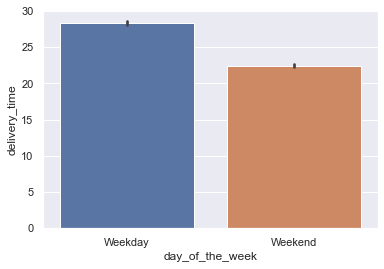

In [23]:
sns.barplot(data=df,y="delivery_time", x="day_of_the_week")

### Observations:

* Delivery time during weekday is higher than weekends.

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

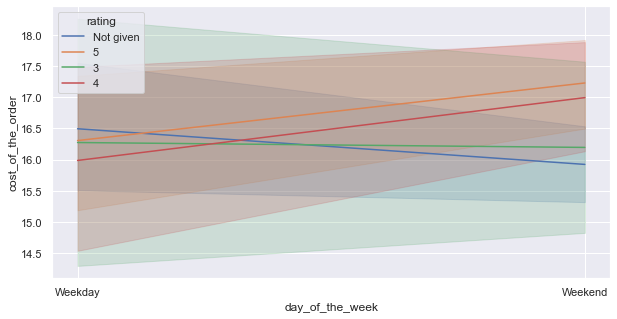

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="day_of_the_week",y="cost_of_the_order",hue="rating")

### Observations:

* The highly rated orders are high in cost than other orders. 
* Most of the non-rated orders are less than 16.5 dollars.
* Customers giving their ratings mostly on weekend orders compare to weekday orders. 
* Most of the weeked orders receives 5 star than weekday orders. 

<AxesSubplot:xlabel='rating', ylabel='cuisine_type'>

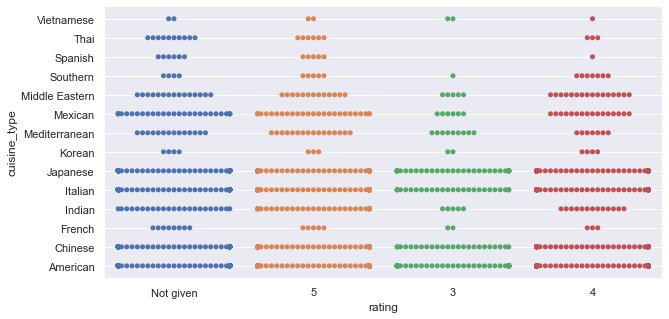

In [25]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=df,y="cuisine_type",x="rating")

### Observations:

* American, Chinese, Italian and Japanese orders are the top rated cusines in the data set which also have many non_rated orders.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='cuisine_type'>

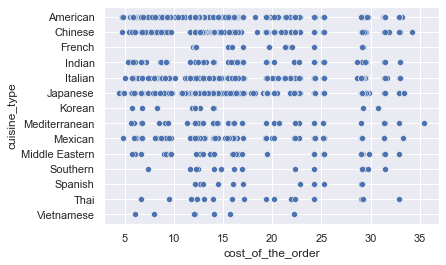

In [26]:
sns.scatterplot(data=df,y="cuisine_type",x="cost_of_the_order")

### Observations:

* Medterranean cuisine is the costliest cuisine for a single order in the data set. 
* American, chinese, Indian, Italian and Japanese orders have the cost_option from 5 dollars to 30 dollars. 

# Multi Variate Analysis

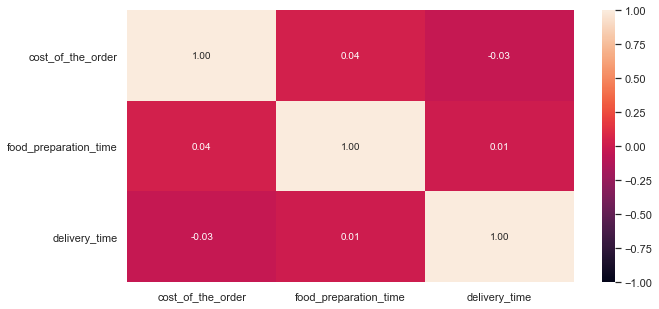

In [27]:
num_var = ['cost_of_the_order','rating','food_preparation_time', 'delivery_time']
corr = df[num_var].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

### Observations:

* There is very less negative correlation between cost_of_the_order and delivery_time
* There is very less positive correlation between cost_of_the_order and food_preparation_time

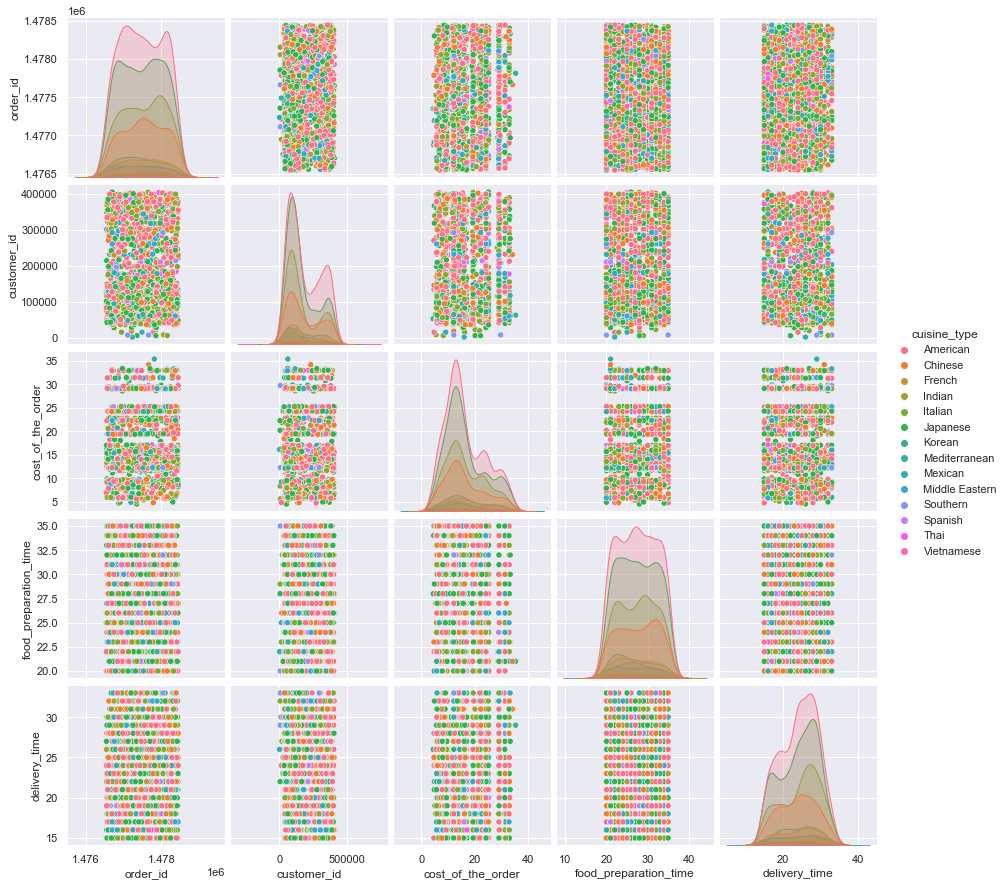

In [28]:
sns.pairplot(df, hue="cuisine_type") # comparing the relationship between 2 variables. 

### Observation

* There is no linear relationship between 2 columns in this data set. 


### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [29]:
# write the code here
df_count_rest=df.groupby(["restaurant_name"])["rating"].count().reset_index() # grouping the restaurants as per ratings count. 
df_count_rest_51=df_count_rest[df_count_rest['rating']>50]['restaurant_name'] # check the restaurants more than 50 rating count
df_count_rest_avg=df_count_rest.groupby(['restaurant_name'])['rating'].mean().reset_index() # avg rating of a restaurant
df_count_rest_avg_5=df_count_rest_avg[df_count_rest_avg["rating"]>4] # check the avg rating for more than 4
df_count_rest_avg_5[df_count_rest_avg_5['restaurant_name'].isin(df_count_rest_51)].sort_values(by='rating',ascending=False).reset_index()
# matching the restaurants with more than 50 rating count and avg rating of more than 4

,index,restaurant_name,rating
0,136,Shake Shack,219
1,153,The Meatball Shop,132
2,21,Blue Ribbon Sushi,119
3,20,Blue Ribbon Fried Chicken,96
4,109,Parm,68
5,121,RedFarm Broadway,59
6,122,RedFarm Hudson,55


#### Observations:

* The restarurants above restaurants has the rating count more than 50 and avg rating of 4. Hence, these are the eligible restaurants to avail the promotional offer. 



### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [30]:
cost_25_rev=df[df["cost_of_the_order"]>20]['cost_of_the_order'].sum()
rev_25_total=cost_25_rev*0.25
print("Revenue of orders generated from order value more than 20$:", "{:.2f}$".format(rev_25_total))
cost_15_rev=df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20)]['cost_of_the_order'].sum()
rev_15_total=cost_15_rev*0.15
print("Revenue of orders generated from order value more than 5$ and less than or equal to 20$:","{:.2f}$".format(rev_15_total))
cost_5_rev=df[(df["cost_of_the_order"]<=5)]['cost_of_the_order'].sum()
rev_5_total=cost_5_rev*0
print("Revenue of orders generated from order value less than 5$:","{:.2f}$".format(rev_5_total))
print("Net Revenue Generated by the company:", "{:.2f}$".format(rev_25_total+rev_15_total+rev_5_total))

Revenue of orders generated from order value more than 20$: 3688.73$
Revenue of orders generated from order value more than 5$ and less than or equal to 20$: 2477.58$
Revenue of orders generated from order value less than 5$: 0.00$
Net Revenue Generated by the company: 6166.30$


#### Observations:

* The company has earned more than 60% of its revenue from the orders over 20 dollars value
* Rest of the revenue was generated from the orders valued between 5$ to 20$ dollars
* There is no revenue from the orders valued below 5$. 


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [31]:
df["Total_time"]=df["food_preparation_time"] + df["delivery_time"].copy()
delivery_61_count=df[df["Total_time"]>60]["Total_time"].count()
print("Total no of orders have more than 60 mins of total delivery time:",delivery_61_count)
Total_orders_count=df['Total_time'].count()
print("Total no of orders:",Total_orders_count)
per_orders=(delivery_61_count/Total_orders_count)*100
print("Percentage of orders got more than 60 mins total time to deliver the order:","{:.2f}%".format(per_orders))


Total no of orders have more than 60 mins of total delivery time: 200
Total no of orders: 1898
Percentage of orders got more than 60 mins total time to deliver the order: 10.54%


#### Observations:
* 10.54% of the orders took more time than 60 mins to deliver the food from the time the orders were placed. 


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [32]:
mean_del_week=df.groupby(by=["day_of_the_week"])["delivery_time"].mean()
print("Mean delivery time during day of the Week:","\n", mean_del_week.round())

Mean delivery time during day of the Week: 
 day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64


#### Observations:
* Mean delivery time during weekday is 28 minutes
* Mean delivery time during weekend is 22  minutes


### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

Conclusion

* We analyzed a dataset of 1898 online order details, with 9 different columns. 
* This data set gives the rating information of the orders which is useful to get insights on popular cuisines and restaurants.
* From what we analysed here There is no skewness or outlier in the data set.
* 736 orders were not rated by the customer. So, the popularity of the cuisines or restaurants derived based on the rated    orders.  

From the given data we have been able to conclude the below factors:

1. The popular restaurant is Shake Shack
2. The popular cusine type is American Cuisine 
3. Most of the orders were placed during weekends. 
4. For most of the orders the ratings were not given and the least amount of orders were rated with 3 stars
5. The least popular cuisine types are Vietnamese, Spanish, Thai, Southern, Korean and French. 
6. There is no outlier in the cost of the order, delivery time and preparation time. 
7. There is no skewness in cost of the order, delivery time and preparationtime. 

Recommendations:

1.  The most popular cuisine during the weekend is American cuisine. 
2. American cuisine is the frquently ordered cuisine among all the other cuisine. 
3. French cuisine is high in cost compare to other cuisin types in the data set.
4. The cheapest cuisine type is Korean cuisine.
5. Food preparation time during weekday and weekends are almost similar with the sort of similar ratings. 
6. Delivery time during weekday is higher than weekends due to the workday traffic.
7. The highly rated orders are high in cost than other orders. 
8. Customers giving their ratings mostly on weekend orders compare to weekday orders. 
9. Most of the weekend orders receives 5 star than weekday orders.
10. American, Chinese, Italian and Japanese orders are the top rated cusines in the data set which also have many non_rated orders.
11. Medterranean cuisine is the costliest cuisine for a single order in the data set. 

Key Insights:

1. There is very less negative correlation between cost_of_the_order and delivery_time
2. There is very less positive correlation between cost_of_the_order and food_preparation_time


#### Key Insights: